In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

In [7]:
titanic_df.isnull().sum().sum()

0

In [8]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
titanic_df['Cabin'].value_counts()

N              687
B96 B98          4
C23 C25 C27      4
G6               4
F33              3
              ... 
C128             1
D28              1
C110             1
E36              1
C70              1
Name: Cabin, Length: 148, dtype: int64

In [10]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [12]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

In [13]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

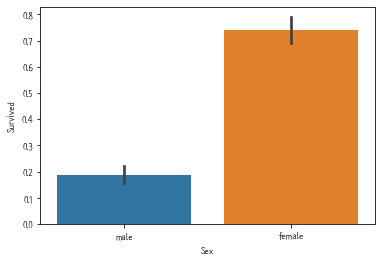

In [14]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

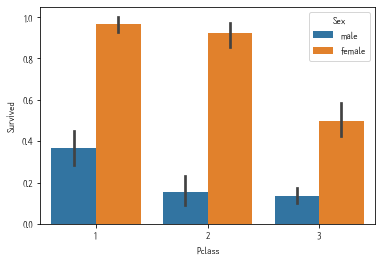

In [17]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

In [25]:
def get_category(age):
    cat=''
    if age<=-1: cat='Unknown'
    elif age <= 5:cat='Baby'
    elif age <= 12:cat='Child'    
    elif age <= 18:cat='Teenager'
    elif age <= 25:cat='Student'
    elif age <= 35:cat='Young Adult'
    elif age <= 60:cat='Adult'
    else:cat='Elderly'    
    return cat

In [26]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(get_category)

In [27]:
titanic_df.head(1)
titanic_df['Age_cat'].value_counts()

Young Adult    373
Adult          195
Student        162
Teenager        70
Baby            44
Child           25
Elderly         22
Name: Age_cat, dtype: int64

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

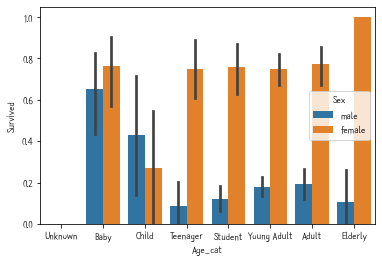

In [28]:
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)